In [2]:
# libraries
!pip install xlrd
import os
import pandas as pd
import openpyxl
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Chapter 2. Introductory Examples

## Content
<a id="index">Content:</a>
1. [Exercise 1](#a)
2. [Exercise 2](#b)
3. [Exercise 3](#c)

<a id="a"></a>
[Index](#index)
## Exercise 1. Usa.gov data from bit.ly

In [3]:
from google.colab import files

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import json

def read_json_to_dataframe(file_path):
  """
  Reads a JSON file and converts it to a Pandas DataFrame.

  Args:
    file_path: The path to the JSON file.

  Returns:
    A Pandas DataFrame.
  """
  with open(file_path, 'r') as f:
    data = json.load(f)

  # Assuming the JSON data is a list of dictionaries
  df = pd.DataFrame(data)
  return df

# Example usage
file_path = '/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/database.json'
df = read_json_to_dataframe(file_path)

# Now you can manipulate the DataFrame 'df'
print(df.head())


     id                         description tags manufacturer  \
0  1008                     Cheese, caraway   []                
1  1009                     Cheese, cheddar   []                
2  1018                        Cheese, edam   []                
3  1019                        Cheese, feta   []                
4  1028  Cheese, mozzarella, part skim milk   []                

                    group                                           portions  \
0  Dairy and Egg Products      [{'amount': 1, 'unit': 'oz', 'grams': 28.35}]   
1  Dairy and Egg Products  [{'amount': 1, 'unit': 'cup, diced', 'grams': ...   
2  Dairy and Egg Products  [{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...   
3  Dairy and Egg Products  [{'amount': 1, 'unit': 'cup, crumbled', 'grams...   
4  Dairy and Egg Products      [{'amount': 1, 'unit': 'oz', 'grams': 28.35}]   

                                           nutrients  
0  [{'value': 25.18, 'units': 'g', 'description':...  
1  [{'value': 24.9

In [6]:

def read_txt_file(file_path):
  """
  Reads a TXT file and returns its content as a string.

  Args:
    file_path: The path to the TXT file.

  Returns:
    A string containing the file content.
  """
  with open(file_path, 'r') as f:
    content = f.read()
  return content

# Example usage
file_path = '/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/example.txt'
file_content = read_txt_file(file_path)

# Now you can use the file_content string
# print(file_content)


records = [json.loads(line) for line in open(file_path)]

# Call a list from a dictionary
records[0]



{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [7]:
# Call a item from the list selected
records[0]['tz']

'America/New_York'

In [8]:
print(records[0]['tz'])

America/New_York


### 1.1 Counting Time Zones in Pure Python

The next code searches a list of dictionaries called records for those dictionaries that contain the key 'tz'. For each dictionary that meets this condition, the value associated with the key 'tz' is extracted and added to a new list called time_zones. Finally, the first 10 elements of this list time_zones are displayed.

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

The next function takes a sequence as input and returns a dictionary where the keys are the elements of the sequence and the values are the number of times each element appears. It is a useful tool for performing frequency analysis and other data-related tasks.

Example usage:

Code

sequence = [1, 2, 2, 3, 3, 3, 4] \
result = get_counts(sequence) \
print(result)  \

Output: {1: 1, 2: 2, 3: 3, 4: 1}

In [10]:
def get_counts(sequence):
 counts = {}
 for x in sequence:
  if x in counts:
    counts[x] += 1
  else:
    counts[x] = 1
 return counts


In [11]:
from collections import defaultdict

def get_counts2(sequence):
  counts = defaultdict(int) # values will initialize to 0
  for x in sequence:
    counts[x] += 1
  return counts

counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

3440

The next function takes a dictionary containing item frequencies and returns a list of the n most frequent items along with their frequencies. First, it reverses the key-value pairs so that the frequencies are at the beginning, then sorts the list in ascending order of frequencies, and finally returns the last n items.

Example usage:


counts = {'a': 5, 'b': 3, 'c': 10, 'd': 2} \
top_results = top_counts(counts, n=2) \
print(top_results) \
Output: [(10, 'c'), (5, 'a')]

In [12]:
def top_counts(count_dict, n=10):
 value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
 value_key_pairs.sort()
 return value_key_pairs[-n:]

top_counts(counts)


[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [13]:
from collections import Counter

counts = Counter(time_zones)

counts.most_common(10)


[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 1.2 Counting Time Zones with pandas

In [14]:
from pandas import DataFrame, Series

import pandas as pd
import numpy as np

frame = DataFrame(records)
frame


,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


In [15]:
frame['tz'][:10]

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York
5,America/New_York
6,Europe/Warsaw
7,
8,
9,


In [16]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36
Europe/Madrid,35


**Breakdown:**

clean_tz = frame['tz'].fillna('Missing'):

Extracts the 'tz' column from the DataFrame frame.
Fills any missing values in the 'tz' column with the string 'Missing'.
Assigns the cleaned series to the variable clean_tz. \

clean_tz[clean_tz == ''] = 'Unknown':

Replaces any empty strings in the clean_tz series with the string 'Unknown'. \

tz_counts = clean_tz.value_counts():

Counts the occurrences of each unique value in the clean_tz series.
Stores the resulting value counts in a new Series named tz_counts. \

tz_counts[:10]:

Selects the first 10 elements from the tz_counts Series, showing the top 10 time zones and their corresponding counts.

In [17]:
clean_tz = frame['tz'].fillna('Missing')

clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

,count
tz,
America/New_York,1251
Unknown,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
Missing,120
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36


<Axes: ylabel='tz'>

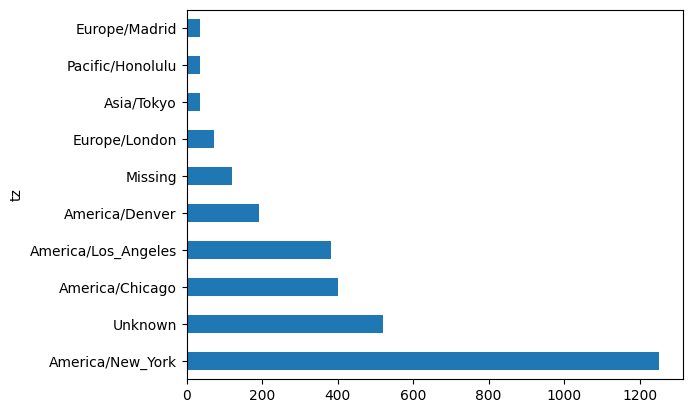

In [18]:
tz_counts[:10].plot(kind='barh', rot=0)


In [19]:
 frame['a'][1]

'GoogleMaps/RochesterNY'

In [20]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [21]:
frame['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

Breakdown:

results = Series([x.split()[0] for x in frame.a.dropna()])

1.   Extracts the 'a' column from the DataFrame frame.
2.   Drops any missing values from the 'a' column using dropna().
3.   Iterates over each non-missing value x in the 'a' column.
4.   Splits each value x into a list of words using split().
5.   Takes the first word from the split list using [0].
6.   Creates a new Series from the list of first words.
7.   Assigns the resulting Series to the variable results.

results[:5]

Selects the first 5 elements from the results Series, showing the first 5 extracted first words.

In [22]:
results = Series([x.split()[0] for x in frame.a.dropna()])

results[:5]

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0


results.value_counts()\
Counts the occurrences of each unique value in the results Series. \

[:8] \
Selects the first 8 elements from the resulting value counts, showing the top 8 most frequent first words and their corresponding counts.

In [23]:
results.value_counts()[:8]

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24
GoogleProducer,21
Mozilla/6.0,5
BlackBerry8520/5.0.0.681,4


Breakdown:

cframe = frame[frame.a.notnull()] \

Extracts the 'a' column from the DataFrame frame.
Applies the notnull() method to the 'a' column, which returns a boolean Series indicating whether each value in the column is not null (i.e., has a value).
Uses the boolean Series as a filter to select rows from the frame DataFrame where the corresponding value in the 'a' column is not null.
Assigns the filtered DataFrame to the variable cframe.

Overall Purpose:

This code snippet creates a new DataFrame cframe that contains only the rows from the original DataFrame frame where the 'a' column is not null. This is useful for filtering out rows with missing or empty values in the 'a' column, which can be important for subsequent analysis or calculations.

In [24]:
cframe = frame[frame.a.notnull()]


In [25]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]


array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [26]:
by_tz_os = cframe.groupby(['tz', operating_system])

agg_counts = by_tz_os.size().unstack().fillna(0)

agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [27]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]


,0
tz,
,24
Africa/Cairo,20
Africa/Casablanca,21
Africa/Ceuta,92
Africa/Johannesburg,87
Africa/Lusaka,53
America/Anchorage,54
America/Argentina/Buenos_Aires,57
America/Argentina/Cordoba,26


In [28]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset


,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<Axes: ylabel='tz'>

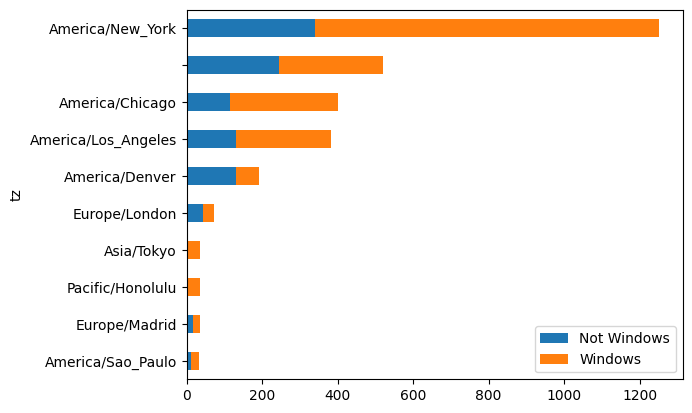

In [29]:
count_subset.plot(kind='barh', stacked=True)

<Axes: ylabel='tz'>

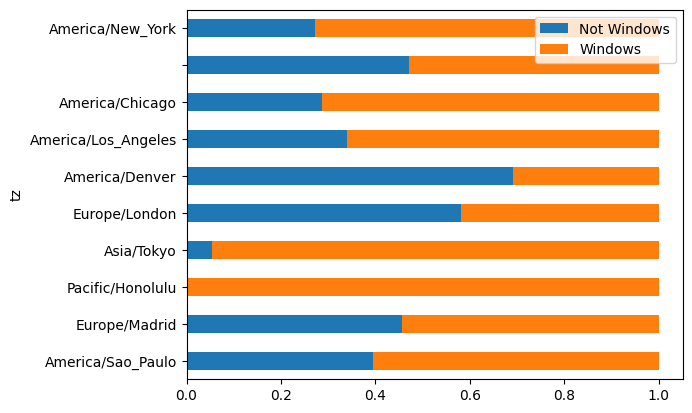

In [30]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

normed_subset.plot(kind='barh', stacked=True)

<a id="b"></a>
[Index](#index)
## Exercise 2. MovieLens 1M Data Set


Write Python code to answer the following questions (make sure the messages displayed by your code are complete and descriptive enough):



In [31]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/users.dat', sep='::', engine ='python', header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/ratings.txt', sep='::', engine ='python', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/movies.dat', sep='::', engine ='python', header=None, names=mnames)

### 2.1. How many users are stored in the users table and what information is stored for each user?

In [32]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [33]:
len(users)

6040

In [34]:
users.dtypes

,0
user_id,int64
gender,object
age,int64
occupation,int64
zip,object


In [35]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [36]:
users.gender.unique()

array(['F', 'M'], dtype=object)

In [37]:
users.occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3, 14,  4, 11,  8, 19,  2,
       18,  5, 13,  6])

There are 6,040 users. For each one of them the dataset has:

*   user_id: a unique id, stored as an integer.
*   gender: a character that identifies the user's gender - possible values are F and M.
*   age: user's age range, coded as explained in the README file, stored as an integer.
*   occupation: user's occupation, coded as an integer.
*   zip: user's ZIP code, stored as a string.

### 2.2.   How many movies are stored in the movies table and what information is stored for each movie?

In [38]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [39]:
len(movies)

3883

In [40]:
movies.dtypes

,0
movie_id,int64
title,object
genres,object


In [41]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


There are 3,883 movies. For each movie the dataset has:

*   movie_id: a unique id, stored as an integer.
*   title: a string with the movie title and year.
*   genres: all genres for the movie, separated by |.

### 2.3.   How many ratings are stored in the ratings table and what information is stored for each rating?

In [42]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [43]:
len(ratings)

1000209

In [44]:
ratings.dtypes

,0
user_id,int64
movie_id,int64
rating,int64
timestamp,int64


In [45]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [46]:
ratings.rating.unique()

array([5, 3, 4, 2, 1])

There are 1.000.209 ratings. For each rating the dataset has:

*   user_id: the id of the user who rated the movie.
*   movied_id: the id of the rated movie.
*   rating: the user rating, in a range from 1 to 5, as an integer.
*   timestamp: seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

### 2.4.   How are users, the movies each user has rated, and the rating related?

They are related by their id fields, user_id and movie_id.

### 2.5.   What is the occupation that maps to most of the users? Plot a bar chart of the occupation counts and report the size of the largest bin.

In [47]:
# Assigning occupations to numbers in the users dataframe

occupation_names = {
    "occupation": {
        0: "other",
        1: "academic/educator",
        2: "artist",
        3: "clerical/admin",
        4: "college/grad student",
        5: "customer service",
        6: "doctor/health care",
        7: "executive/managerial",
        8: "farmer",
        9: "homemaker",
        10: "K-12 student",
        11: "lawyer",
        12: "programmer",
        13: "retired",
        14: "sales/marketing",
        15: "scientist",
        16: "self-employed",
        17: "technician/engineer",
        18: "tradesman/craftsman",
        19: "unemployed",
        20: "writer",
    }
}

users.replace(occupation_names, inplace=True)

In [48]:
occupation_by_users = (
    users.groupby("occupation")["user_id"].count().sort_values(ascending=True)
)

In [49]:
print(
    "Occupation with most users: {}, with {} users".format(
        occupation_by_users.index[0], occupation_by_users.iloc[0]
    )
)

Occupation with most users: farmer, with 17 users


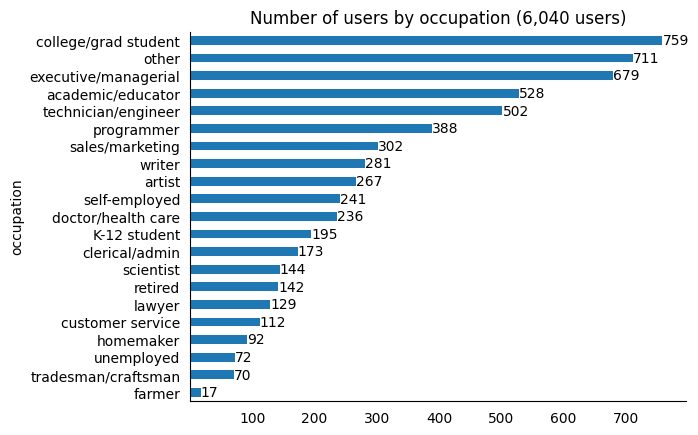

In [50]:
# Formatting the chart area
def format_graph(ax):
    # Remove box around the graph
    for s in ("right", "top"):
        ax.spines[s].set_visible(False)

    # Remove all tick marks
    plt.tick_params(bottom=False, top=False, left=False, right=False)

def formatted_barh_graph(df, title):
    ax = df.plot.barh(title=title)
    format_graph(ax)

    # And now, nitpicking (zero can be inferred)
    ax.xaxis.get_major_ticks()[0].label1.set_visible(False)

    # Add data labels to the end of the bars
    for index, value in enumerate(df.values):
        ax.text(value, index, str(value), ha='left', va='center')

title = "Number of users by occupation ({:,} users)".format(len(users))
formatted_barh_graph(occupation_by_users, title)

plt.show()


### 2.6.   What percentage of users are 50 years old or older? Plot a pie chart showing all percentages (per age group) and report the requested value. (Mejorar colocando un degradado a la torta y las etiquetas de datos externas)

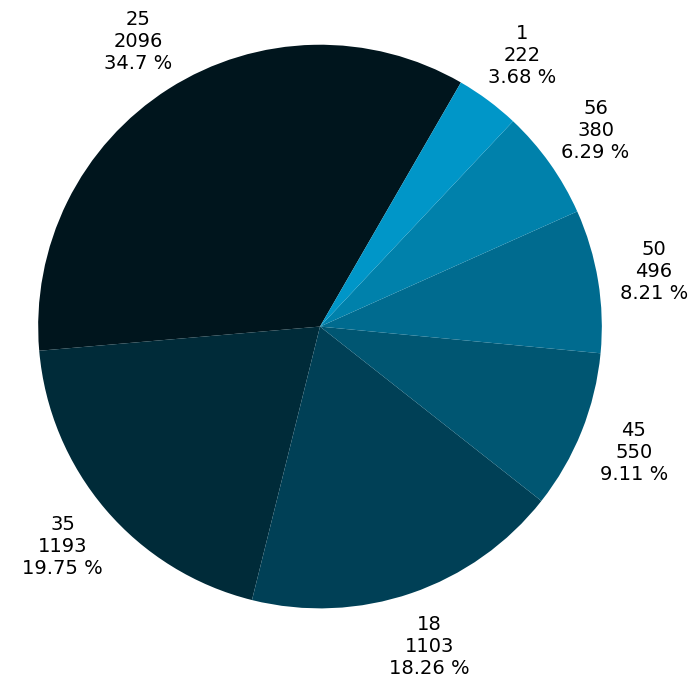

Percentage of users 50 years old or older: 14.50%


In [51]:
# Supongamos que 'users' es un DataFrame de pandas con la columna 'age'

# Calculate the percentage of users 50 years old or older
older_users = len(users[users['age'] >= 50])
total_users = len(users)
percentage_older = (older_users / total_users) * 100


# Nombrar la columna a la cual se le va a realizar el gráfico de torta
col = 'age'

# Función para generar colores degradados
def generate_gradient_colors(base_color, num_colors):
    base_color = np.array(base_color) / 255
    gradient = [base_color * (1 - (num_colors - i)/num_colors) for i in range(1, num_colors+1)]
    return gradient


# Generar colores degradados

edad = users[col].unique()

base_color = [0, 150, 200]

colores = generate_gradient_colors(base_color, len(edad))

# 1. Contar la cantidad de valores repetidos
conteo_valores = users[col].value_counts()

# 2. Creando el gráfico de torta con etiquetas y etiquetas de datos
fig, ax = plt.subplots(figsize=(8, 8))

# Eliminar el fondo blanco del gráfico
fig.patch.set_visible(False)
ax.patch.set_visible(False)

wedges, texts, autotexts = ax.pie(conteo_valores.values,
                                  colors=colores,
                                  autopct='',
                                  startangle=60,
                                  textprops={'fontsize': 12})

# 3. La relación de aspecto uniforme garantiza que el gráfico circular se dibuje como un círculo.
ax.axis('equal')

# plt.title(f'Distribución de valores en la columna {columna_a_graficar}')

# 4. Asignando conteo_valores.values a sizes
sizes = conteo_valores.values

# 5. Añadiendo etiqueta de datos a cada porción
for i, label in enumerate(conteo_valores.index):
    # 5.1 Calcular la posición de la etiqueta usando theta1 and theta2 attributes
    angle = np.deg2rad((ax.patches[i].theta1 + ax.patches[i].theta2) / 2)
    x = np.cos(angle)
    y = np.sin(angle)

    # 5.2 Ajustar la distancia de las etiquetas al centro
    offset = 1.2  # Ajusta este valor para cambiar la distancia

    # 5.3 Crear la etiqueta con múltiples líneas
    ax.text(x * offset, y * offset, f"{label}\n{sizes[i]}\n{round(sizes[i]/sum(sizes)*100, 2)} %", ha='center', va='center', fontsize = 14)

# 6. Mostrar gráfico
plt.show()

# 7. Imprimir porcentaje
print(f"Percentage of users 50 years old or older: {percentage_older:.2f}%")

### 2.7.   Which movie received the highest number of ratings (and how were such ratings distributed)?

In [52]:
# prompt: Which movie received the highest number of ratings (and how were such ratings distributed)?

# Merge ratings and movies DataFrames to link movie titles with ratings
data = pd.merge(ratings, movies, on='movie_id')

# Group by movie title and count the number of ratings
movie_ratings_count = data.groupby('title')['rating'].count()

# Find the movie with the highest number of ratings
most_rated_movie = movie_ratings_count.idxmax()
highest_rating_count = movie_ratings_count.max()

print(f"The movie with the highest number of ratings is '{most_rated_movie}' with {highest_rating_count} ratings.")


The movie with the highest number of ratings is 'American Beauty (1999)' with 3428 ratings.


In [53]:
# Analyze the rating distribution for the most rated movie
rating_distribution = data[data['title'] == most_rated_movie]['rating'].value_counts().sort_index()

print("\nRating distribution for the most rated movie:")
rating_distribution


Rating distribution for the most rated movie:


,count
rating,
1,83
2,134
3,358
4,890
5,1963


### 2.8.   What is the average rating for all movies/users?

In [54]:
# Calculate the average rating for all movies/users
average_rating = ratings['rating'].mean()

print(f"The average rating for all movies/users is: {average_rating:.2f}")

The average rating for all movies/users is: 3.58


In [55]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,K-12 student,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,K-12 student,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,K-12 student,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,K-12 student,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,doctor/health care,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,doctor/health care,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,doctor/health care,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,doctor/health care,11106,Sophie's Choice (1982),Drama


In [56]:
# Build pivot table

mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:5]


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [57]:
# Group ratings by title

ratings_by_title = data.groupby('title').size()
ratings_by_title


,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
"Zed & Two Noughts, A (1985)",29
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2


In [58]:
ratings_by_title[:10]

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
1-900 (1994),2
10 Things I Hate About You (1999),700
101 Dalmatians (1961),565
101 Dalmatians (1996),364


In [59]:
# Select only movies with 250 ratings or more

active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [60]:
# DataFrame.at    Access a single value for a row/column label pair.
# DataFrame.iloc  Access group of rows and columns by integer position(s).
# DataFrame.xs    Returns a cross-section (row(s) or column(s)) from the Series/DataFrame.
# Series.loc      Access group of values using labels.

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [61]:
# Fix naming inconsistency
mean_ratings = mean_ratings.rename(
    index={
        "Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)": "Seven Samurai (Shichinin no samurai) (1954)"
    }
)
"""
Este diccionario indica que queremos cambiar el índice llamado "Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)"
por "Seven Samurai (Shichinin no samurai) (1954)". En otras palabras, estamos simplificando el nombre del índice eliminando
la parte en inglés ("The Magnificent Seven").
"""

# mean_ratings.at["Seven Samurai (Shichinin no samurai) (1954)", "F"]
# mean_ratings.loc["Seven Samurai (Shichinin no samurai) (1954)", "F"]

mean_ratings.xs("Seven Samurai (Shichinin no samurai) (1954)")

,Seven Samurai (Shichinin no samurai) (1954)
gender,
F,4.481132
M,4.576628


In [62]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

top_female_ratings[:10]


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 2.9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.

In [63]:
mean_ratings.sort_values(by="M", ascending=False).head(10)

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


### 2.10.   Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

In [64]:
# Build pivot table
age_mean_ratings = data.pivot_table(
    "rating", index="title", columns="age", aggfunc="mean"
)

# Select movies with 300 ratings or more
ratings_by_title = data.groupby("title").size()
active_titles = ratings_by_title.index[ratings_by_title >= 300]
age_mean_ratings = age_mean_ratings.loc[active_titles]

# Select ratings for young viewers
young_mean_ratings = age_mean_ratings[1]

# Account for possible ties: get the top ten rating values
top_ten_ratings = young_mean_ratings.sort_values(ascending=False).unique()[:10]

# Show all movies that fall into the "top 10 ratings" range
with pd.option_context("display.max_rows", None):
    print(
        young_mean_ratings[young_mean_ratings >= top_ten_ratings[-1]].sort_values(
            ascending=False
        )
    )

title
Metropolis (1926)                                4.888889
GoodFellas (1990)                                4.840000
Third Man, The (1949)                            4.818182
Double Indemnity (1944)                          4.777778
Piano, The (1993)                                4.750000
Fried Green Tomatoes (1991)                      4.750000
Raging Bull (1980)                               4.714286
Roman Holiday (1953)                             4.687500
Citizen Kane (1941)                              4.680000
Real Genius (1985)                               4.666667
Apostle, The (1997)                              4.666667
Notorious (1946)                                 4.666667
From Here to Eternity (1953)                     4.666667
Charade (1963)                                   4.666667
Manchurian Candidate, The (1962)                 4.666667
Princess Mononoke, The (Mononoke Hime) (1997)    4.636364
Bridge on the River Kwai, The (1957)             4.636364
Name: 1,

### 2.11.   The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.


In [65]:
# prompt: The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.

mean_ratings['diff'] = mean_ratings['F'] - mean_ratings['M']

sorted_by_diff = mean_ratings.sort_values(by='diff', ascending=False)[:10]

sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359
Grease (1978),3.975265,3.367041,0.608224
Little Women (1994),3.870588,3.321739,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777
Anastasia (1997),3.800000,3.281609,0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,0.512885
"Color Purple, The (1985)",4.158192,3.659341,0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,0.487561


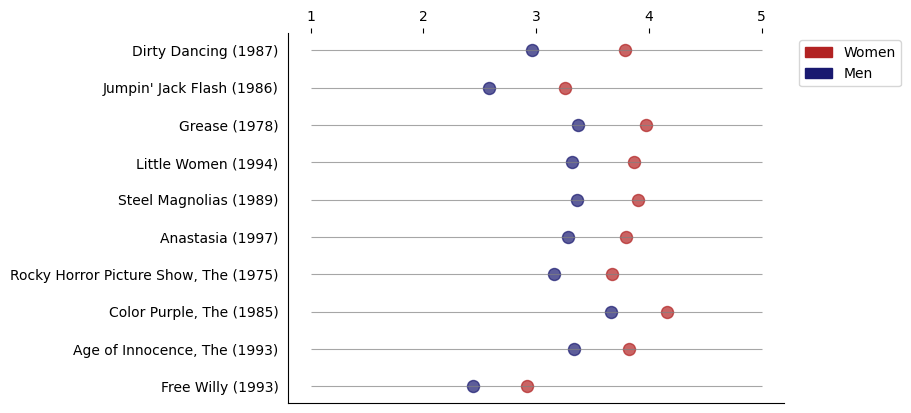

In [66]:
import matplotlib.patches as mpatches


def plot_ratings_difference(df):
    F_COLOR, M_COLOR = "firebrick", "midnightblue"

    fig, ax = plt.subplots()
    ax.hlines(y=df.index, xmin=1, xmax=5, color="gray", alpha=0.7, linewidth=0.8)
    ax.scatter(y=df.index, x=df.F, s=75, color=F_COLOR, alpha=0.7)
    ax.scatter(y=df.index, x=df.M, s=75, color=M_COLOR, alpha=0.7)

    format_graph(ax)
    plt.gca().invert_yaxis()
    plt.xticks([1, 2, 3, 4, 5])
    ax.xaxis.set_ticks_position("top")

    # Manually add the legend
    plt.legend(
        loc="upper right",
        bbox_to_anchor=(1.25, 1),
        handles=[
            mpatches.Patch(color=F_COLOR, label="Women"),
            mpatches.Patch(color=M_COLOR, label="Men"),
        ],
    )


plot_ratings_difference(sorted_by_diff)

### 2.12.   The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.


In [67]:
# prompt: The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

sorted_by_diff[::-1][:10]

pref_by_men = mean_ratings.sort_values(by="diff", ascending=True)[:10]
pref_by_men


gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,-0.611985
"Hidden, The (1987)",3.137931,3.745098,-0.607167
Rocky III (1982),2.361702,2.943503,-0.581801
Caddyshack (1980),3.396135,3.969737,-0.573602


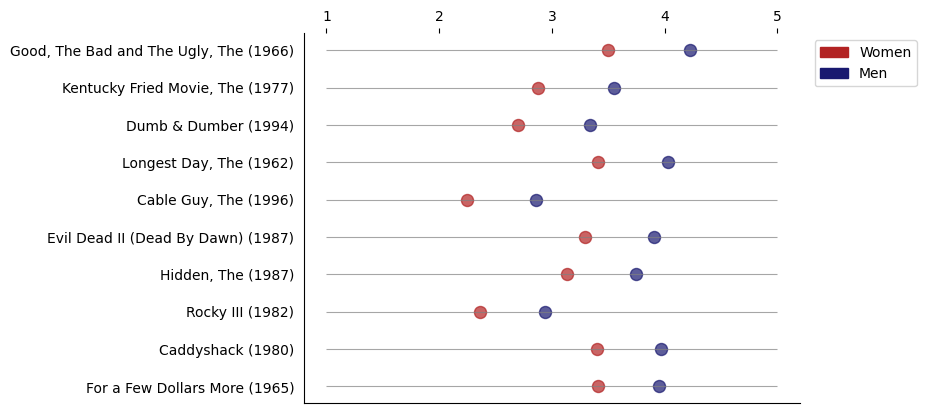

In [68]:
plot_ratings_difference(pref_by_men)

### 2.13.   display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification. (Falta mejorar...)

In [69]:
# prompt: display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification.

# Calculate the standard deviation of ratings for each movie
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter for movies with at least 250 ratings
rating_std_by_title = rating_std_by_title[ratings_by_title >= 250]

# Sort by standard deviation in descending order and display the top 10
top_10_disagreement = rating_std_by_title.sort_values(ascending=False)[:10]

print("Top 10 movies with the most disagreement among viewers:")
top_10_disagreement

Top 10 movies with the most disagreement among viewers:


,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


In [106]:
total_ratings = data.pivot_table(
    "user_id", index="title", columns="rating", aggfunc="count"
)
total_ratings.head(3)

rating,1,2,3,4,5
title,,,,,
"$1,000,000 Duck (1971)",3.0,8.0,15.0,7.0,4.0
'Night Mother (1986),4.0,10.0,25.0,18.0,13.0
'Til There Was You (1997),5.0,20.0,15.0,10.0,2.0


In [70]:
# Se usa para ubicar un elemento dentro del dataframe indicando la fila y la columna
# cuando ":" aparece solo, indica que es toda la fila o columna
# cuando " 2: " indica que es desde el indice dado hasta el final
# cuando aparece un número negativo indica que se cuenta desde el final
# data.iloc[Rows , columns]
# data.iloc[Row]
# data.iloc[Row, :]
# data.iloc[ : , column]
# data.iloc[start:end , start:end]

data.iloc[0]


,0
user_id,1
movie_id,1193
rating,5
timestamp,978300760
gender,F
age,1
occupation,K-12 student
zip,48067
title,One Flew Over the Cuckoo's Nest (1975)
genres,Drama


### 2.1 Measuring rating disagreement

In [71]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

sorted_by_diff = mean_ratings.sort_values(by='diff')

sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [72]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [73]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]


,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Billy Madison (1995),1.249970
Bicentennial Man (1999),1.245533
Babe: Pig in the City (1998),1.239379


In [74]:
# creating the DataFrame
#marks_data = pd.DataFrame({'ID': {0: 23, 1: 43, 2: 12,
#                                  3: 13, 4: 67, 5: 89,
#                                 6: 90, 7: 56, 8: 34},
#                           'Name': {0: 'Ram', 1: 'Deep',
#                                   2: 'Yash', 3: 'Aman',
#                                    4: 'Arjun', 5: 'Aditya',
#                                    6: 'Divya', 7: 'Chalsea',
#                                    8: 'Akash'},
#                           'Marks': {0: 89, 1: 97, 2: 45, 3: 78,
#                                     4: 56, 5: 76, 6: 100, 7: 87,
#                                     8: 81},
#                           'Grade': {0: 'B', 1: 'A', 2: 'F', 3: 'C',
#                                     4: 'E', 5: 'C', 6: 'A', 7: 'B',
#                                     8: 'B'}})

# determining the name of the file
# file_name = 'Data.xlsx'

# saving the excel
# data.to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')
# para descargar el excel se le da a la carpeta que está en la barra lateral a la izquierda!

<a id="c"></a>
[Index](#index)
### Exercise 3. US Baby Names 1880-2023

In [75]:
names1880 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880


,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [76]:
names1880.groupby('sex').births.sum()

,births
sex,
F,90994
M,110490


In [77]:
# 2023 is the last available year right now
years = range(1880, 2023)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
  path = '/content/drive/MyDrive/Colab_Notebooks/Python-for-Data-Analysis/chapter_02/names/yob%d.txt' % year
  frame = pd.read_csv(path, names=columns)

  frame['year'] = year
  pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)


In [78]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2085532,Zoumana,M,5,2022
2085533,Zuberi,M,5,2022
2085534,Zylon,M,5,2022
2085535,Zymeer,M,5,2022


In [79]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc="sum")

total_births.tail()



sex,F,M
year,,
2018,1699569,1814581
2019,1676568,1792223
2020,1614196,1723649
2021,1638188,1746499
2022,1636657,1741954


<Axes: title={'center': 'Total births by sex and year'}, xlabel='year'>

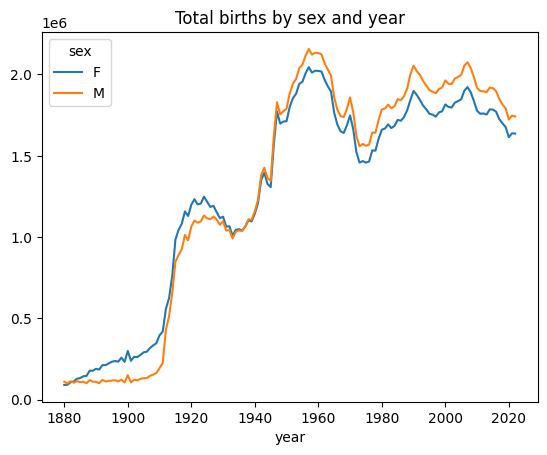

In [80]:
total_births.plot(title='Total births by sex and year')

In [81]:
def add_prop(group):
  # Integer division floors
  births = group.births.astype(float)
  group['prop'] = births / births.sum()
  return group

names = names.groupby(['year', 'sex']).apply(add_prop)

names

<ipython-input-81-95d969e77202>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex']).apply(add_prop)


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2022 M   2085532    Zoumana   M       5  2022  0.000003
         2085533     Zuberi   M       5  2022  0.000003
         2085534      Zylon   M       5  2022  0.000003
         2085535     Zymeer   M       5  2022  0.000003
         2085536    Zymeire   M       5  2022  0.000003

[2085537 rows x 5 columns]

In [82]:
names = names.reset_index(drop=True) # Reset the index to move 'year' and 'sex' from the index to a column
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)


True

In [83]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000

<ipython-input-83-42fb335605bb>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2022 M   2072221     Asaiah   M     223  2022  0.000128
         2072222     Atharv   M     223  2022  0.000128
         2072223      Imran   M     223  2022  0.000128
         2072224      Ivaan   M     223  2022  0.000128
         2072225    Maurice   M     223  2022  0.000128

[285876 rows x 5 columns]

In [84]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
  pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
285871,Asaiah,M,223,2022,0.000128
285872,Atharv,M,223,2022,0.000128
285873,Imran,M,223,2022,0.000128
285874,Ivaan,M,223,2022,0.000128


### 3.2 Analyzing Naming Trends

In [85]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [86]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')

total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,NaN,3841.0,NaN,488.0,NaN,5991.0,NaN,NaN,NaN,...,277.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3664.0,NaN,419.0,NaN,5541.0,NaN,NaN,209.0,...,266.0,NaN,NaN,353.0,NaN,NaN,1182.0,NaN,540.0,213.0
2020,NaN,NaN,3576.0,NaN,419.0,NaN,5094.0,NaN,256.0,NaN,...,276.0,NaN,NaN,308.0,282.0,NaN,1268.0,226.0,671.0,NaN


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

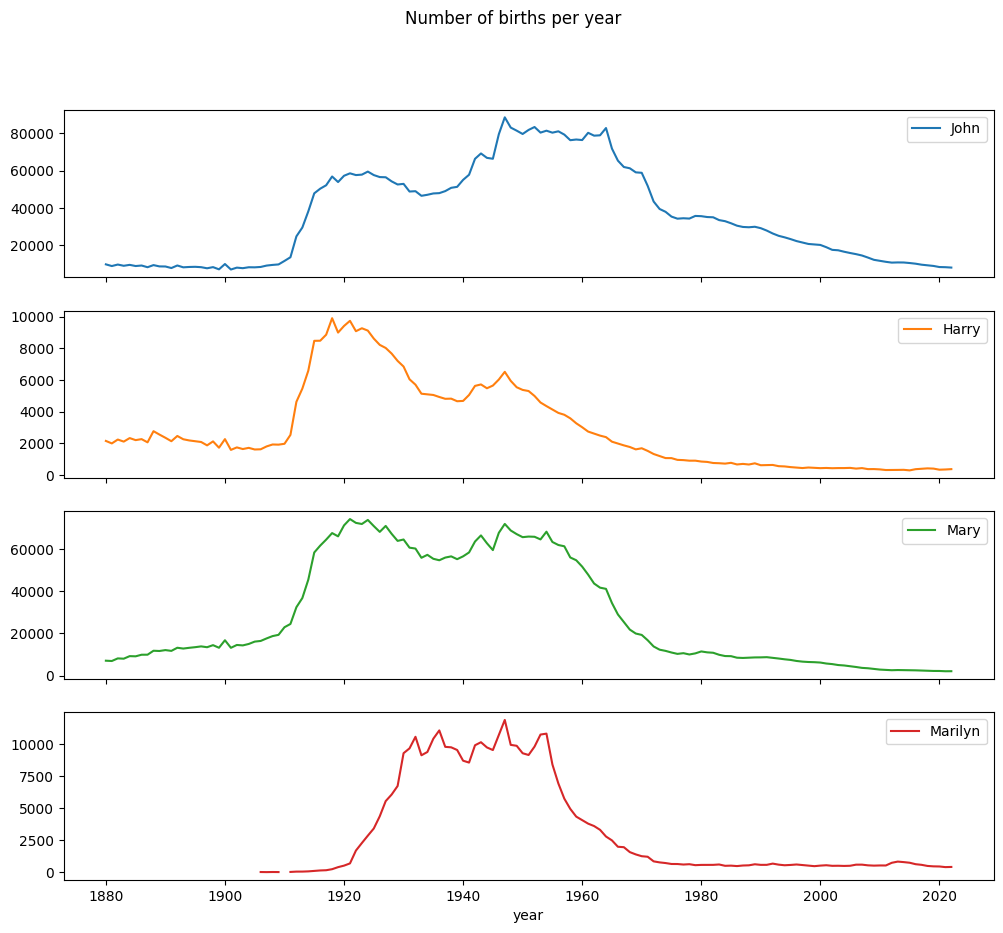

In [87]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")



#### Measuring the increase in naming diversity

<Axes: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

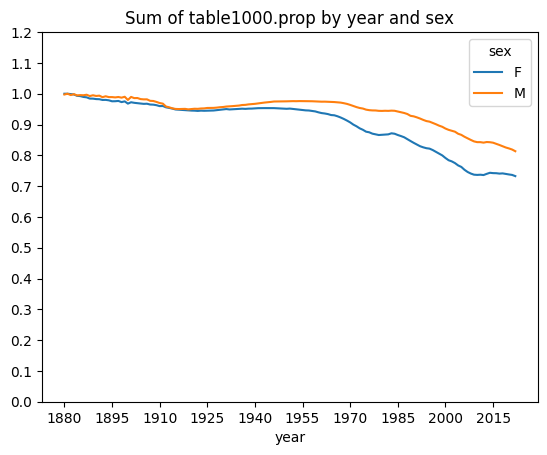

In [88]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')

table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 15))


In [89]:
df = boys[boys.year == 2010]

df


,name,sex,births,year,prop
260876,Jacob,M,22148,2010,0.011547
260877,Ethan,M,18015,2010,0.009392
260878,Michael,M,17376,2010,0.009059
260879,Jayden,M,17198,2010,0.008966
260880,William,M,17068,2010,0.008898
...,...,...,...,...,...
261871,Truman,M,197,2010,0.000103
261872,Bailey,M,196,2010,0.000102
261873,Destin,M,196,2010,0.000102
261874,Eliezer,M,196,2010,0.000102


In [90]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

prop_cumsum[:10]


,prop
260876,0.011547
260877,0.020939
260878,0.029997
260879,0.038963
260880,0.047862
260881,0.056603
260882,0.065192
260883,0.073459
260884,0.081564
260885,0.089647


In [91]:
prop_cumsum.searchsorted(0.5)


116

In [92]:
df = boys[boys.year == 1900]

in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

in1900.searchsorted(0.5) + 1

25

In [93]:
def get_quantile_count(group, q=0.5):
  group = group.sort_values(by='prop', ascending=False)
  return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.head()

<ipython-input-93-a316fc7309d4>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)


sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

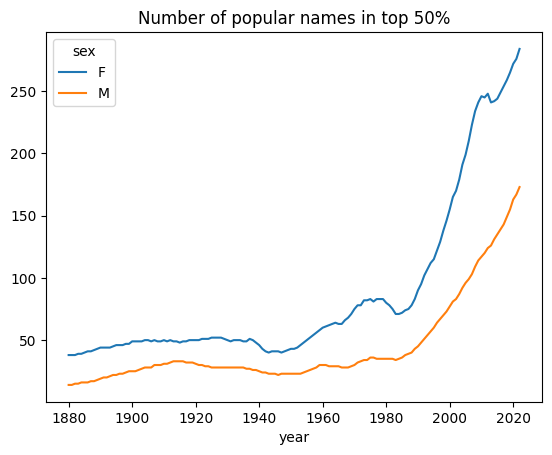

In [94]:
diversity.plot(title="Number of popular names in top 50%")

#### The “Last letter” Revolution

In [95]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc='sum')
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2013      2014      2015   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27485.0   28335.0   29079.0   
b                NaN      NaN      NaN  ...   33292.0   31436.0   29662.0   
c                NaN      NaN      NaN  ...   24108.0   23863.0   23171.0   
d             1027.0   1298.0   1374.0  ...   42750.0   44110.0   43856.0   
e            54353.0  66748.0  66662.0  ...  132430.0  132297.0  128818.0   
f                NaN      NaN      NaN  ...    2594.0    2883.0    2829.0   
g               25.0     44.0     28.0  ...    4430.0    4726.0    4976.0   
h             7141.0   8630.0   8825.0  ...  100101.0  102249.0  102802.0   
i              105.0    141.0    134.0  ...   45496.0   46671.0   49122.0   
j                NaN      NaN      NaN  ...    1407.0    1364.0    1455.0   
k               19.0     21.0     22.0  ...   34896.0   35820.0   35435.0   
l             6174.0   7900.0   8395.0  ...  126963.0  127727.0  127997.0   
m               90.0    123.0    137.0  ...   57135.0   58799.0   59206.0   
n             5512.0   6832.0   7103.0  ...  670080.0  674087.0  663133.0   
o               97.0    134.0    142.0  ...   79562.0   82451.0   86672.0   
p                NaN      NaN      NaN  ...    2601.0    2526.0    2383.0   
q                NaN      NaN      NaN  ...     336.0     312.0     351.0   
r              910.0   1207.0   1214.0  ...  170574.0  178372.0  181336.0   
s             2803.0   3581.0   3569.0  ...  123938.0  128353.0  130282.0   
t             3140.0   3816.0   3784.0  ...

In [96]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691262.0  677461.0    977.0    5217.0   28900.0
b                 NaN     694.0     455.0    411.0    3913.0   39311.0
c                 5.0      49.0     958.0    482.0   15454.0   23373.0
d              6751.0    3731.0    2645.0  22111.0  262108.0   44871.0
e            133599.0  434981.0  317085.0  28665.0  178757.0  130374.0

In [97]:
subtable.sum()


sex  year
F    1910     396503.0
     1960    2021888.0
     2010    1777014.0
M    1910     194208.0
     1960    2132033.0
     2010    1918132.0
dtype: float64

In [98]:
letter_prop = subtable / subtable.sum().astype(float)


<Axes: title={'center': 'Female'}, xlabel='last_letter'>

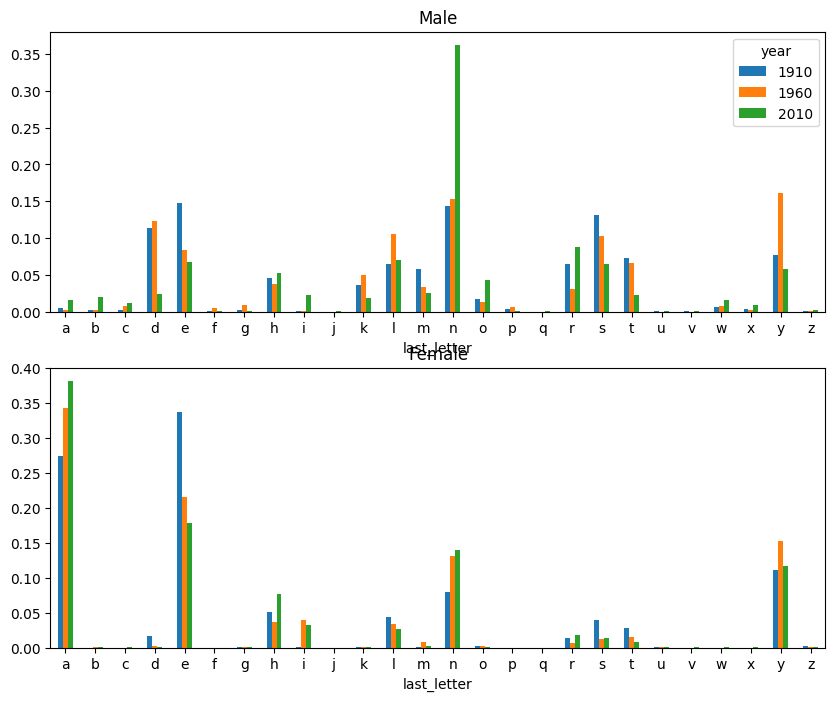

In [99]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [100]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083238,0.153214,0.077461
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

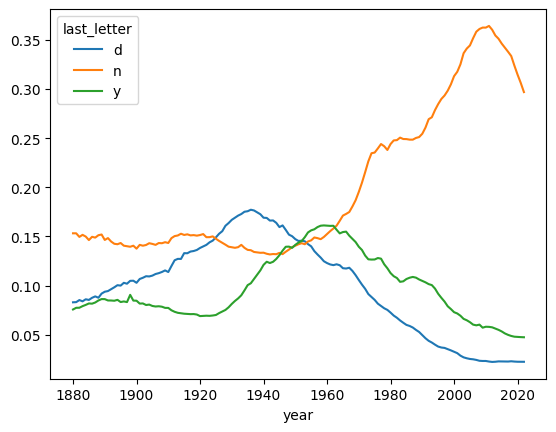

In [101]:
dny_ts.plot()


#### Boy names that became girl names (and vice versa)

In [102]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [103]:
filtered = top1000[top1000.name.isin(lesley_like)]

filtered.groupby('name').births.sum()

,births
name,
Leslee,1083
Lesley,35038
Lesli,929
Leslie,380178
Lesly,11434


In [104]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN
2022,1.0,NaN


<Axes: xlabel='year'>

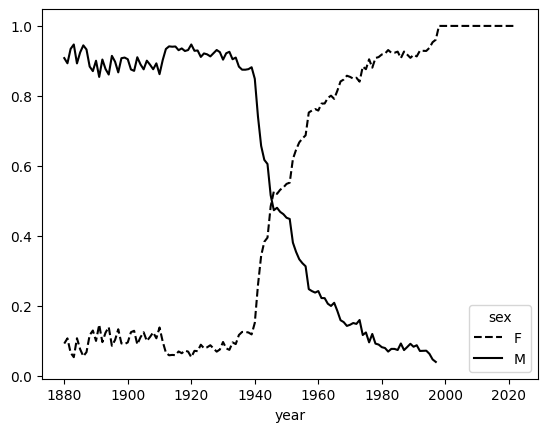

In [105]:
table.plot(style={'M': 'k-', 'F': 'k--'})

https://github.com/fau-masters-collected-works-cgarbin/cap5768-introduction-to-data-science/blob/master/assignment2/CAP5768_Assignment2_cgarbin.ipynb